In [14]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch,FontManager
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
pd.set_option('display.max_columns',113)

In [2]:
country="Germany"
division="1. Bundesliga"
season="2023/2024"
gender="male"
team = "Bayer Leverkusen"

events_df = sb.competition_events(
    country=country,
    division=division,
    season=season,
    gender=gender)

In [5]:
events_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won',
       ...
       'shot_technique', 'shot_type', 'substitution_outcome',
       'substitution_replacement', 'tactics', 'team', 'team_id', 'timestamp',
       'type', 'under_pressure'],
      dtype='object', length=108)

In [4]:
events_df['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Miscontrol', 'Dribble', 'Duel', 'Interception',
       'Ball Recovery', 'Dispossessed', 'Block', 'Foul Committed',
       'Foul Won', 'Error', 'Shot', 'Goal Keeper', 'Injury Stoppage',
       'Referee Ball-Drop', '50/50', 'Clearance', 'Offside',
       'Dribbled Past', 'Player Off', 'Player On', 'Half End',
       'Substitution', 'Bad Behaviour', 'Tactical Shift', 'Shield',
       'Own Goal For', 'Own Goal Against'], dtype=object)

In [8]:
# filter chelsea pressure events
mask_bayer_pressure = (events_df.team == team) & (events_df.type == 'Pressure')
df = events_df.loc[mask_bayer_pressure, ['location']]

In [9]:
df.head()

,location
110002,"[85.5, 15.4]"
110003,"[55.6, 14.8]"
110004,"[51.0, 15.8]"
110005,"[57.7, 20.5]"
110009,"[74.8, 46.6]"


In [10]:
df['x'] = df.apply(lambda x: x['location'][0],axis=1)
df['y'] = df.apply(lambda x: x['location'][1],axis=1)

In [11]:
df.head()

,location,x,y
110002,"[85.5, 15.4]",85.5,15.4
110003,"[55.6, 14.8]",55.6,14.8
110004,"[51.0, 15.8]",51.0,15.8
110005,"[57.7, 20.5]",57.7,20.5
110009,"[74.8, 46.6]",74.8,46.6


In [15]:
# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

# fontmanager for google font (robotto)
robotto_regular = FontManager()

path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

Text(0.5, 0.5, 'Pressure applied by\n Bayer Leverkusen Men')

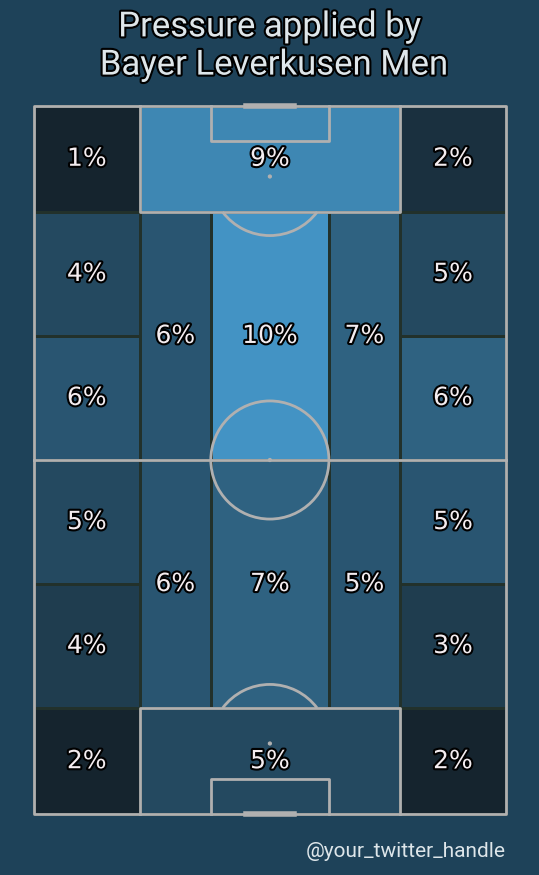

In [17]:
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#1e4259')
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      title_height=0.08, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#1e4259')

# heatmap and labels
bin_statistic = pitch.bin_statistic_positional(df.x, df.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=pearl_earring_cmap, edgecolors='#22312b')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

# endnote and title
axs['endnote'].text(1, 0.5, '@your_twitter_handle', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
axs['title'].text(0.5, 0.5, "Pressure applied by\n Bayer Leverkusen Men", color='#dee6ea',
                  va='center', ha='center', path_effects=path_eff,
                  fontproperties=robotto_regular.prop, fontsize=25)